<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Hands-on Practice with Pandas and Matplotlib</p>



In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import pi

%matplotlib inline

<p style="font-family: Arial; font-size:1.3em;color:purple; font-style:bold"><br>
1: Get the data and inspect it</p>
 
**Load the data** into a Pandas Dataframe. **Inspect all the columns**, and <b>read the data dictionary <a href="https://www.kaggle.com/c/titanic/data">on Kaggle</a></b> to understand their meaning. **Print the shape of the dataframe and its head**.

To avoid confusion, note that this isn't the exact same dataset from Kaggle. Kaggle just has a nicely formatted data dictionary.  The dataset we're using (<a href="http://biostat.mc.vanderbilt.edu/wiki/Main/DataSets">source</a>) includes data on all available passengers as well as their lables. Kaggle's version does not, for reasons you can guess. 

In [2]:
titanic = pd.read_csv("./titanic_data.csv")
print(titanic.shape)
titanic.head()

(1309, 11)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


<p style="font-family: Arial; font-size:1.3em;color:purple; font-style:bold"><br>
2: Clean the data</p>

Next, we want to remove rows with null values, as usual. However, first it may be a good idea to see if there are any columns that we can get rid of. Two reasons for wanting to do this are:<br>
1. If any columns have way too many NaN values, we should get rid of these. If we don't, we'll frivolously remove rows that only have NaN's in these columns, which we don't want to do.
2. Not all columns provide valuable information anyway

**Find the name of the column with the most missing values. Then, drop it from the DataFrame.**<br>
**Also, drop the ticket ticket column** because it's not useful to us.
Once these columns are removed, **drop any rows that have NaN in the remaining columns**

In [6]:
titanic.isnull().sum(axis=0)

pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64

In [7]:
try:
    titanic = titanic.drop(['cabin', 'ticket'], axis=1)
except KeyError:
    print("Already dropped")
titanic = titanic.dropna(axis=0)
original = titanic.copy()
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,151.5500,S


<p style="font-family: Arial; font-size:1.3em;color:purple; font-style:bold"><br>
3: Do Some Visualizations</p>

First, lets see how age and travel class are related.<br> 
<b>Build a <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html">Matplotlib hisogram</a></b> for ages by first, second and third class tickets. For the histogram(s)
<ul>
    <li>x-axis is age</li>
    <li>y-axis is occurences of passengers at that age in the given travel group</li>
    <li>The number of buckets you choose for the histogram is up to you</li>
</ul>

*Note: Remember to title your plots and label all your axes!*

(array([ 3.,  1.,  3., 19., 27., 25., 29., 42., 21., 41., 26., 20., 17.,
         3.,  3.]),
 array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]),
 <a list of 1 Patch objects>)

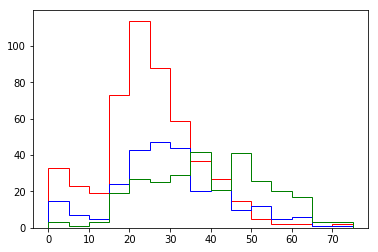

In [10]:
first_class = titanic.age[titanic.pclass == 1]
second_class = titanic.age[titanic.pclass == 2]
third_class = titanic.age[titanic.pclass == 3]
x_axis = range(0, int(titanic.age.max()))
x_labels = range(0, int(titanic.age.max()),5)
plt.hist(third_class, x_labels, edgecolor='red', histtype='step')
plt.hist(second_class, x_labels, edgecolor='blue', histtype='step')
plt.hist(first_class, x_labels, edgecolor='green', histtype='step') 

There were different locations from which passengers embarked. Build a <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html">Matplotlib bar chart</a></b> where:<br>
<ul>
    <li>x-axis is location</li>
    <li>y-axis is occurences of passengers embarking at that location</li>
</ul>

S    781
C    212
Q     50
Name: embarked, dtype: int64


Text(0.5, 1.0, 'Passengers per boarding location')

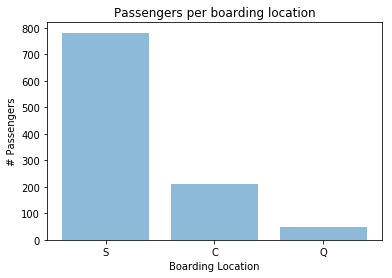

In [6]:
embarked = titanic.embarked.value_counts()
#ax5.set_xlim(-1, len(df.Embarked.value_counts()))
# specifies the parameters of our graphs
print(embarked)
plt.bar([0,1,2], embarked, align='center', alpha=0.5)
plt.xticks(range(0, len(embarked)), list(embarked.index))
plt.ylabel('# Passengers')
plt.xlabel('Boarding Location')
plt.title("Passengers per boarding location")

Time for a more morbid visualization. Build one <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html">Matplotlib bar chart</a></b> that represents survival/casualty rates for males and females. This will requre you to plot 4 bars in total, where two bars will overlay the other two. The larger of each overlaid bar is the total count of that gender, and the smaller is the coun that survived.
<ul>
    <li>x-axis is gender</li>
    <li>y-axis is # of passengers</li>
    <li>2 bars for each gender<ul>
        <li>One bar represents total # passengers</li>
        <li>One bar represents # passengers that survived</li></ul>
    </li>
</ul>

Male survival: 0.2054794520547945
Female survival: 0.7512953367875648


Text(0.5, 1.0, 'Passenger mortality rates')

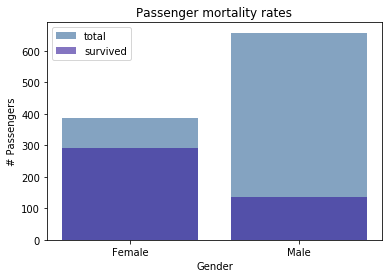

In [7]:
f_count = len(titanic[titanic.sex == 'female'])
f_survived = len(titanic[(titanic.sex == 'female') & (titanic.survived == 1)])
f_percentage = f_survived*1.0/f_count

m_count = len(titanic[titanic.sex == 'male'])
m_survived = len(titanic[(titanic.sex == 'male') & (titanic.survived == 1)])
m_percentage = m_survived*1.0/m_count

print('Male survival:', m_percentage)
print('Female survival:', f_percentage)

plt.bar([0,1], [f_count, m_count], align='center', color=(0.2, 0.4, 0.6, 0.6), label='total')
plt.bar([0,1], [f_survived, m_survived], align='center', color=(0.2, 0.1, 0.6, 0.6), label='survived')
plt.legend(loc='best')
plt.xticks([0,1], ['Female', 'Male'])
plt.ylabel('# Passengers')
plt.xlabel('Gender')
plt.title("Passenger mortality rates")

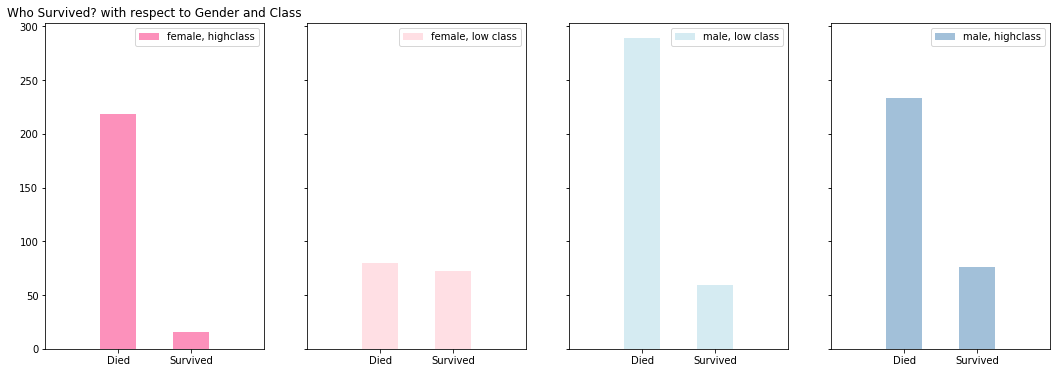

In [22]:
fig = plt.figure(figsize=(18,6))
df = titanic.copy()
alpha_level = 0.5
ax1=fig.add_subplot(141)
female_highclass = df.survived[df.sex == 'female'][df.pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Died", "Survived"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = df.survived[df.sex == 'female'][df.pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = df.survived[df.sex == 'male'][df.pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = df.survived[df.sex == 'male'][df.pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

<p style="font-family: Arial; font-size:1.3em;color:purple; font-style:bold"><br>
4: Predict survival</p>

*Note:* Please make a copy of the original dataset before  doing the following

Separate the data into it's features and labels. Since we're trying to predict survival rate, the labels will be the survival column. The features we'll use will exclude the name, sex and embarked (think about why - there are different reasons for dropping name vs. dropping sex and embarked). Drop these two columns from your dataset. The result should be a (1309, 7) DataFrame called features and a (1309,) DataFrame called labels. 



In [8]:
from sklearn.utils import shuffle
random_state = 123
titanic = titanic.drop(['name', 'embarked', 'sex'], axis=1, errors='ignore')
titanic = shuffle(titanic, random_state=random_state)
data = titanic.drop('survived', axis=1)
labels = titanic['survived']
print (data.shape, labels.shape)
print ('data:\n', data.head())
print ('labels:\n', labels.head())

(1043, 5) (1043,)
data:
      pclass    age  sibsp  parch    fare
359       2   0.83      0      2  29.000
268       1  24.00      1      0  60.000
591       2   5.00      1      2  27.750
990       3  29.00      0      0   7.925
684       3  32.00      1      1  15.500
labels:
 359    1
268    0
591    1
990    0
684    0
Name: survived, dtype: int64


Now, **split your labels and data each into a train and test portion**. Note that it's important that train features and train labels align perfectly (same for test features and labels). Let's use 80% of the data for training

In [9]:
train_portion = int(len(data)*.8)

X_train = data.iloc[:train_portion]
y_train = labels.iloc[:train_portion]
X_test = data.iloc[train_portion:]
y_test = labels.iloc[train_portion:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

X_train.head()

(834, 5) (834,)
(209, 5) (209,)


,pclass,age,sibsp,parch,fare
359,2,0.83,0,2,29.000
268,1,24.00,1,0,60.000
591,2,5.00,1,2,27.750
990,3,29.00,0,0,7.925
684,3,32.00,1,1,15.500


Now, fit a classifier to your training data. Let's use <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">Logistic Regression</a>


In [10]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(X_train, y_train)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
y_test_predictions = pd.DataFrame(logit.predict(X_test))
accuracy_score(y_test, y_test_predictions)

0.6602870813397129

<p style="font-family: Arial; font-size:1.3em;color:purple; font-style:bold"><br>
5: More features</p>

To allow our model to use and embarked and sex columns, let's transform them to numerical values.<br>
We'll <a href="https://www.kaggle.com/dansbecker/using-categorical-data-with-one-hot-encoding">one hot encode</a> these string features. There's a <a href="https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.get_dummies.html">convenient pandas function</a> to help us with this.
Remember to still drop the name column, we're not using this as it holds no predictive value.

In [12]:
titanic = original.copy()
titanic = shuffle(titanic, random_state=random_state)
titanic = titanic.drop(['name'], axis=1, errors='ignore')
data = titanic.drop('survived', axis=1)
labels = titanic['survived']

new_cols_sex = pd.get_dummies(data['sex'], prefix='sex')
new_cols_embarked = pd.get_dummies(data['embarked'], prefix='embarked')
data = data.drop(['sex', 'embarked'], axis=1, errors='ignore')

data = pd.concat([data, new_cols_sex, new_cols_embarked], axis=1)

train_portion = int(len(data)*.8)

X_train = data.iloc[:train_portion]
y_train = labels.iloc[:train_portion]
X_test = data.iloc[train_portion:]
y_test = labels.iloc[train_portion:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
X_train.head()

(834, 10) (834,)
(209, 10) (209,)


,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
359,2,0.83,0,2,29.000,0,1,0,0,1
268,1,24.00,1,0,60.000,0,1,0,0,1
591,2,5.00,1,2,27.750,1,0,0,0,1
990,3,29.00,0,0,7.925,0,1,0,0,1
684,3,32.00,1,1,15.500,1,0,0,1,0


In [13]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(X_train, y_train)
y_test_predictions = pd.DataFrame(logit.predict(X_test))
accuracy_score(y_test, y_test_predictions)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.784688995215311